# Algoritmo de clasificación de imágenes

In [1]:
# Importar paquetes
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image

2023-08-08 08:31:26.872737: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-08 08:31:30.189665: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-08 08:31:30.190666: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-08 08:31:35.841052: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


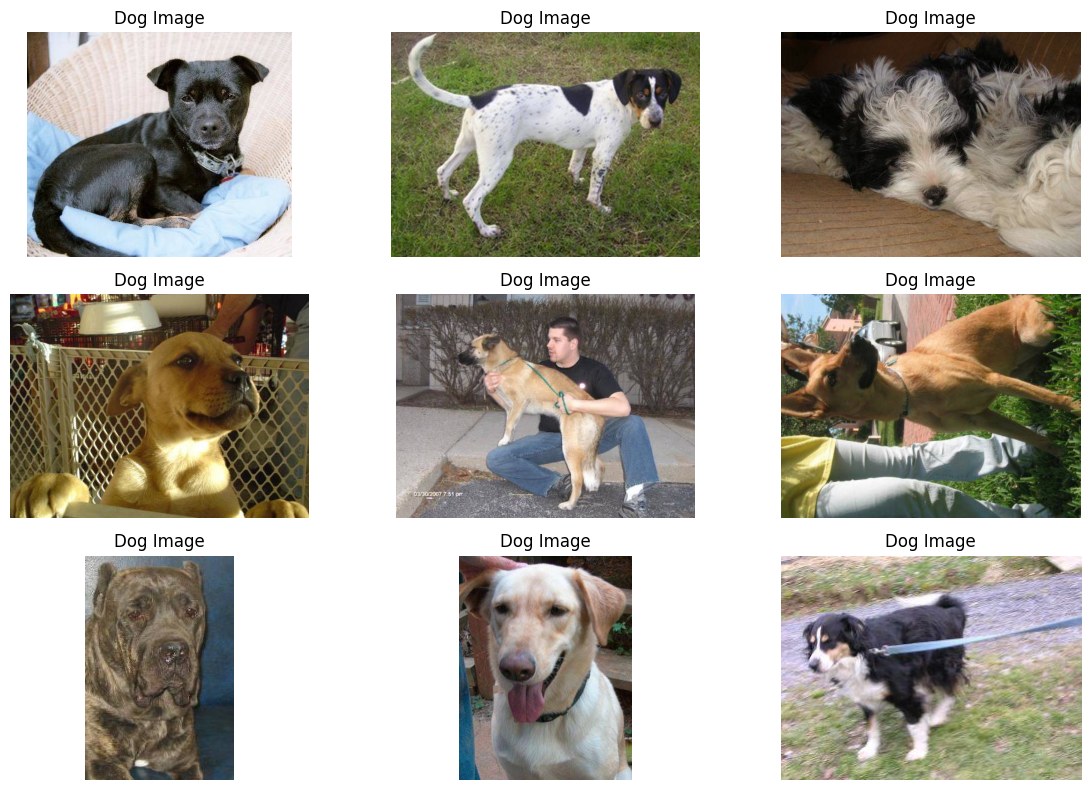

In [2]:
# Importar y comprobar las 9 primeras imágenes de perros

# Ruta al directorio que contiene sus datos de imagen
data_dir = "../data/raw"

# Obtener una lista de todos los nombres de archivos de imágenes de perros
dog_subfolder = os.path.join(data_dir, "dog")

# Obtener una lista de todos los nombres de archivos de imágenes de perros
dog_image_files = os.listdir(dog_subfolder)

# Cargar las nueve primeras imágenes de perros
dog_images = []
for i in range(9):
    img_path = os.path.join(dog_subfolder, dog_image_files[i])
    img = image.load_img(img_path)  # Ajuste target_size según sea necesario
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalice los valores de los píxeles a [0, 1].
    dog_images.append(img_array)

# Cree una única figura para mostrar las nueve imágenes
plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.title('Dog Image')
    plt.axis('off')

# Ajustar el diseño
plt.tight_layout()

# Mostrar las imágenes
plt.show()

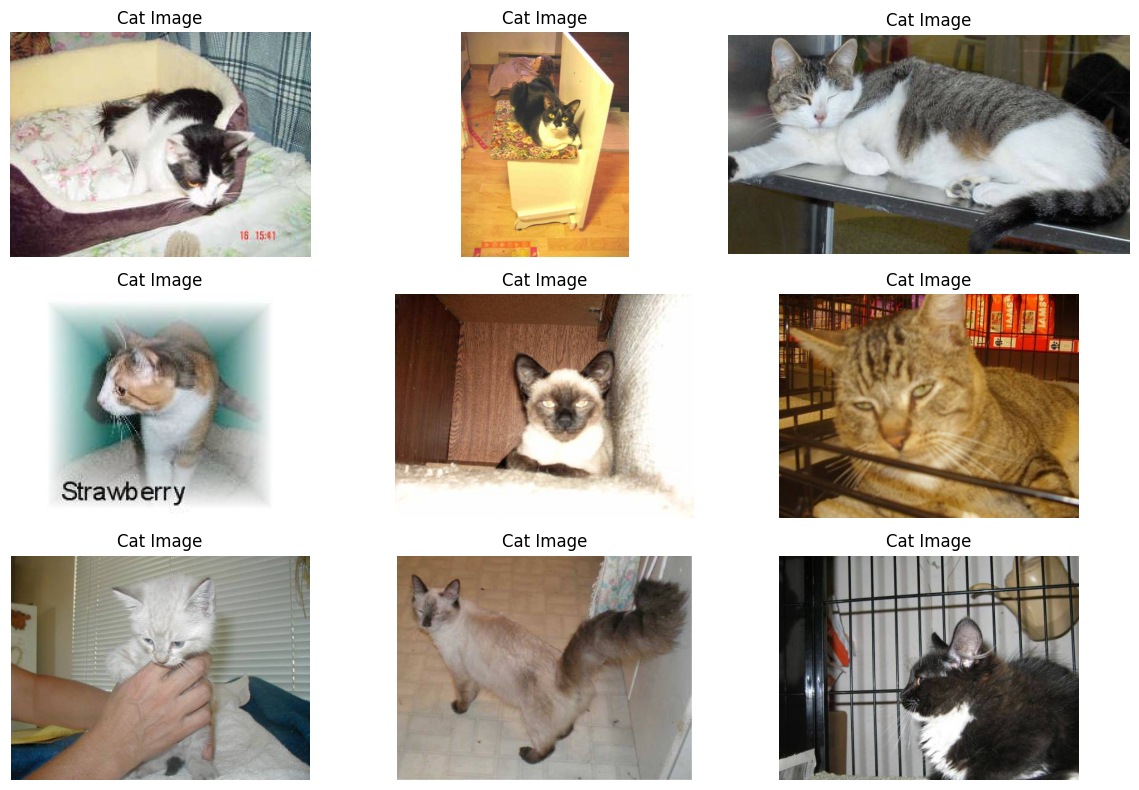

In [ ]:
# Importar y comprobar las 9 primeras imágenes de gatos

# Ruta al directorio que contiene sus datos de imagen
data_dir = "../data/raw"

# Obtener una lista de todos los nombres de archivos de imagen Cat
cats_subfolder = os.path.join(data_dir, "cat")

# Obtener una lista de todos los nombres de archivos de imagen Cat
cats_image_files = os.listdir(cats_subfolder)

# Cargar las nueve primeras imágenes de gato
cats_images = []
for i in range(min(9, len(cats_image_files))):  # Limitar a las imágenes de gato disponibles
    img_path = os.path.join(cats_subfolder, cats_image_files[i])
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)
    img_array /= 255.0
    cats_images.append(img_array)

# Crear una única figura para mostrar todas las imágenes cat
plt.figure(figsize=(12, 8))

for i in range(len(cats_images)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cats_images[i])
    plt.title('Cat Image')
    plt.axis('off')

# Ajustar el diseño
plt.tight_layout()

# Mostrar las imágenes
plt.show()

#### Crear los conjuntos de datos de imágenes


In [4]:
from keras.preprocessing.image import ImageDataGenerator

# Definir algunas reglas para DataGen
train_dir = "../data/raw"
image_size = (200, 200)

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

# Generación de datos de entrenamiento
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["dog", "cat"] 
)

# Generación de datos de prueba
test_data = datagentest.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["test"] 
)

Found 25000 images belonging to 2 classes.


Found 12500 images belonging to 1 classes.


#### Entrenar al modelo

In [5]:
# Mover los datos a través de la red neuronal
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

model = Sequential()
model.add(Conv2D(input_shape = (224,224,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

# Mover los datos por las capas densas
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

In [6]:
# Compilar el modelo con Adam 
from keras.optimizers import Adam

# Compilar el modelo antes del entrenamiento
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])

In [7]:
# Entrenar el modelo
model.fit(train_data, epochs = 1)

782/782 [==============================] - 3686s 5s/step - loss: 14.4442 - accuracy: 0.4970


#### Guardar nuestro modelo para utilizarlo más tarde

In [9]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("../models/vgg16_1.h5", monitor = "val_accuracy", verbose = 1, save_best_only = True, save_weights_only = False, mode = "auto")
early = EarlyStopping(monitor = "val_accuracy", patience = 3, verbose = 1, mode = "auto")
hist = model.fit(train_data, steps_per_epoch = 100, validation_data = test_data, validation_steps = 10, epochs = 3, callbacks = [checkpoint, early])

Epoch 1/3


100/100 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.4941
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to /workspaces/ImageClassifier/models/vgg16_1.h5


/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 483s 5s/step - loss: 0.6932 - accuracy: 0.4941 - val_loss: 1.3863 - val_accuracy: 1.0000
Epoch 2/3
100/100 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.5031
Epoch 2: val_accuracy did not improve from 1.00000
100/100 [==============================] - 481s 5s/step - loss: 0.6933 - accuracy: 0.5031 - val_loss: 1.3863 - val_accuracy: 1.0000
Epoch 3/3
100/100 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.5056
Epoch 3: val_accuracy did not improve from 1.00000
100/100 [==============================] - 484s 5s/step - loss: 0.6932 - accuracy: 0.5056 - val_loss: 1.3863 - val_accuracy: 1.0000


#### Debido a las limitaciones de espacio de GitHub, el modelo no estará dentro de la carpeta models
##### Lo mismo con las fotos originales, no están en el repo

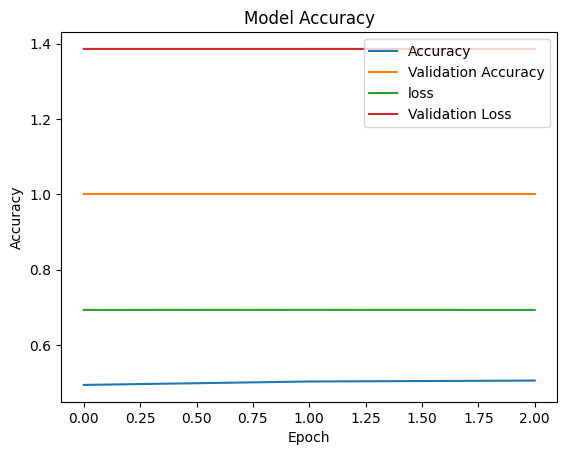

In [10]:
# Comprobar la exactitud de los datos

# Trazar los resultados
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])

# Configurar el diseño del gráfico
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])

# Trazar
plt.show()

### Intenta predecir las imágenes

1/1 [==============================] - 0s 154ms/step
cat


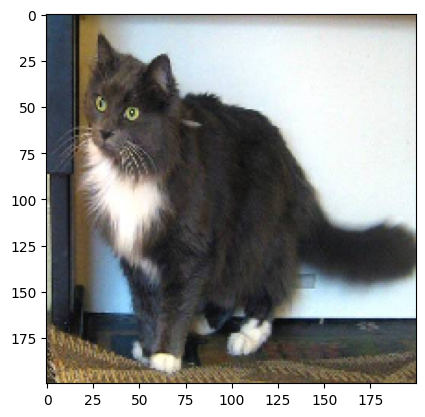

In [12]:
from keras.preprocessing import image
from keras.models import load_model

img = image.load_img("../data/raw/test/9.jpg", target_size = (200, 200))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis = 0)
saved_model = load_model("../models/vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print("dog")